In [2]:
!nvidia-smi

Mon Feb 16 19:33:58 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  |   00000000:07:00.0 Off |                    0 |
| N/A   33C    P0             87W /  400W |   73083MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [3]:
import os
from pathlib import Path

import keypoint_moseq as kpms
os.getcwd()

'/projects/kumar-lab/miaod/projects/unsupervised-aging'

In [5]:

import sys
sys.path.insert(0, str(Path(os.environ["UNSUPERVISED_AGING"]) / "src/kpms_utils"))
from src.methods import load_and_format_data, generate_plots_and_movies

In [6]:
project_name  = "2025-09-20_kpms-v5_150_6"
model_name    = "2025-09-21_model-1"
kpms_dir      = Path(os.environ["UNSUPERVISED_AGING"]) / "data/kpms_projects"
poses_csv_dir = Path(os.environ["UNSUPERVISED_AGING"]) / "data/datasets/combined_1126/poses_csv"

project_dir = kpms_dir / project_name
assert kpms_dir.is_dir() and poses_csv_dir.is_dir()
assert (project_dir / model_name / "results.h5").is_file()

In [ ]:
results = kpms.load_results(project_dir, model_name)

In [6]:
config_fn = lambda: kpms.load_config(project_dir)
_, _, coordinates = load_and_format_data(poses_csv_dir, project_dir)
coordinates = {k: v[..., ::-1] for k, v in coordinates.items()}

Loading keypoint files:   0%|                                                                                                                                                             | 0/1126 [00:00<?, ?it/s]

Loading keypoint files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1126/1126 [09:09<00:00,  2.05it/s]


In [7]:
assert len(results) == len(coordinates)

_tmp = config_fn()
_tmp["video_dir"] = poses_csv_dir / "../videos"

Saving trajectory plots to /projects/kumar-lab/miaod/projects/unsupervised-aging/data/kpms_projects/2025-09-20_kpms-v5_150_6/2025-09-21_model-1/trajectory_plots


Generating trajectory plots: 100%|██████| 43/43 [00:21<00:00,  1.96it/s]


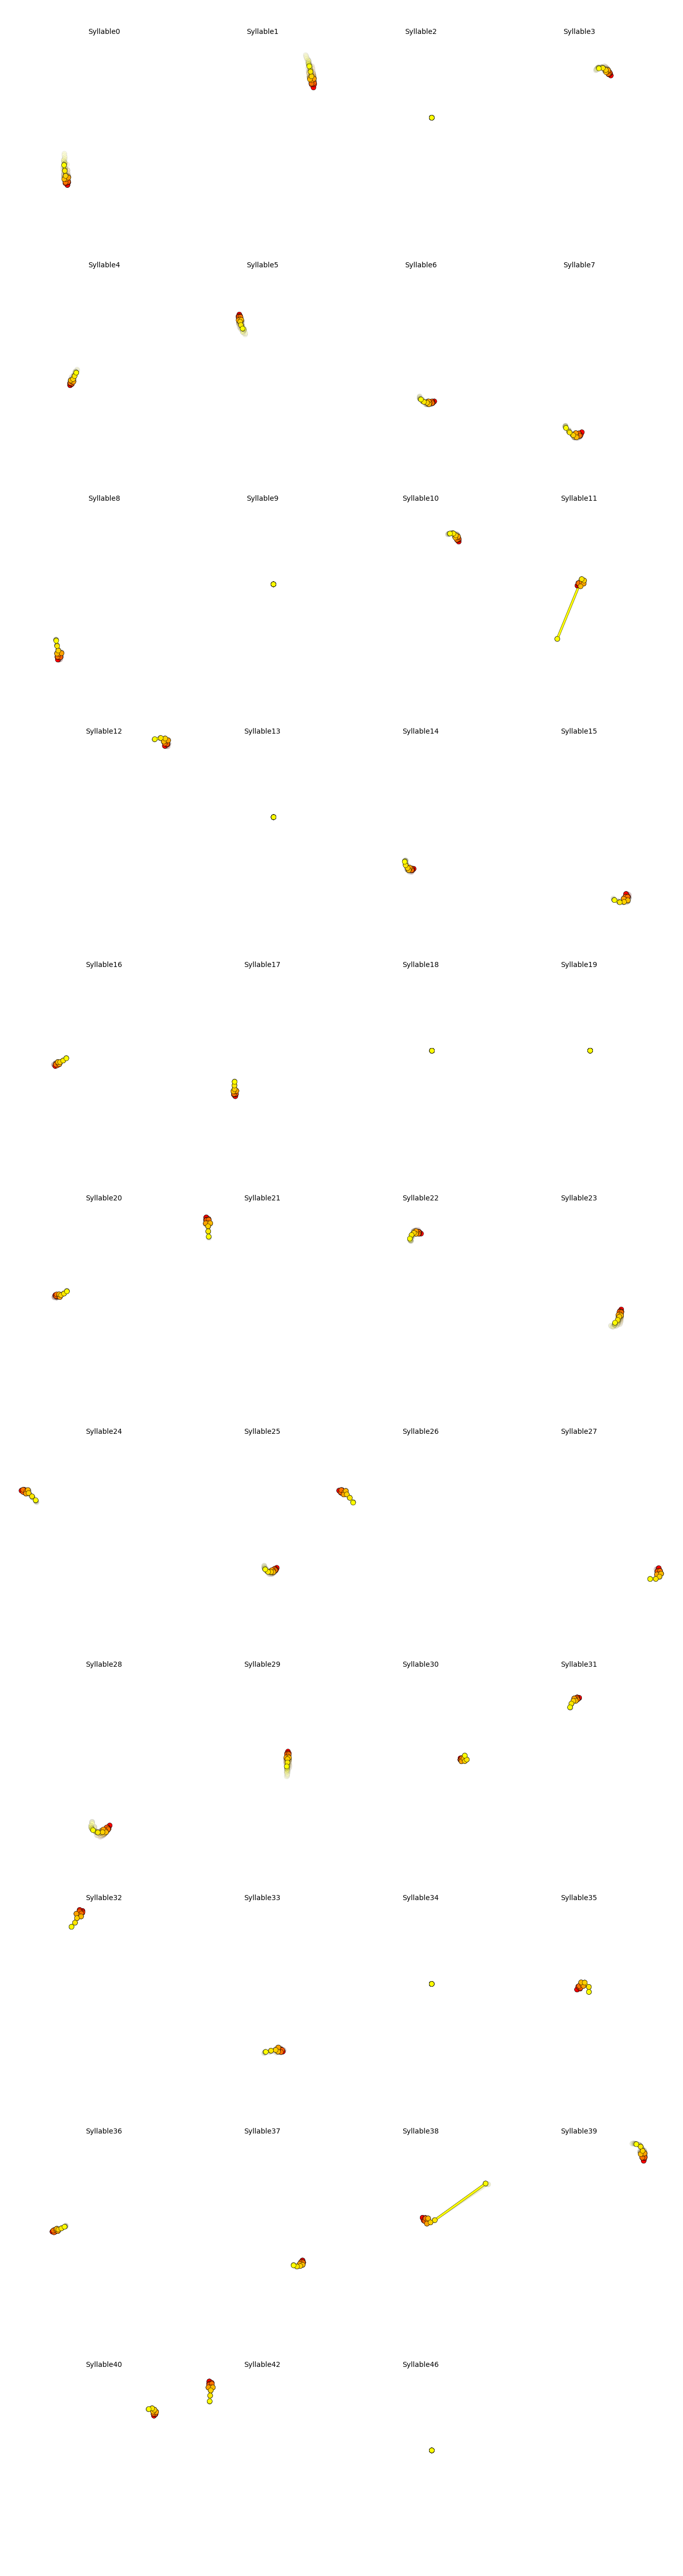

In [ ]:
kpms.generate_trajectory_plots(coordinates, results, project_dir, model_name, **_tmp)

In [ ]:
results

{'Batch2__LL1-B6__2023-07-06_MFS__DO2271_DO_F_25075.csv': {'centroid': array([[ -3.65805321,  -1.52972396],
         [ -3.45348752,  -1.58331194],
         [ -3.85521237,  -0.28274623],
         ...,
         [ 54.38749879, 265.54900832],
         [ 54.35243925, 265.31265891],
         [ 54.70158383, 264.9809231 ]]),
  'heading': array([ 1.78724854, -1.43415209,  1.19329745, ...,  1.31729534,
          1.31293015,  1.2267606 ]),
  'latent_state': array([[-2.87252363e+00, -4.29184413e+00, -3.75122201e-01, ...,
           3.72463425e+00,  9.09967537e+00,  6.18834839e-01],
         [ 2.03620129e+00,  4.49798342e+00,  7.30502097e+00, ...,
          -3.19694655e+00, -3.51420832e+00,  2.43063321e+00],
         [-8.23003191e-01,  1.94872620e+00,  3.33577859e-01, ...,
          -4.74516229e-01, -4.64712118e-01,  9.58151438e-01],
         ...,
         [-3.31108809e-01, -1.20409945e-01,  6.02876835e-01, ...,
          -1.79680500e-01,  6.62587410e-03,  2.50868588e-01],
         [-3.04195505e-01

In [ ]:
coordinates

{'LL6-B2B__2020-06-26_SPD__AgedB6-1273.csv': array([[[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],
 
        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],
 
        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],
 
        ...,
 
        [[ 82., 431.],
         [ 89., 421.],
         [ 74., 425.],
         ...,
         [ 65., 398.],
         [ 59., 425.],
         [ 51., 437.]],
 
        [[ 83., 431.],
         [ 89., 421.],
         [ 74., 425.],
         ...,
         [ 65., 395.],
         [ 59., 425.],
         [ 51., 437.]],
 
        [[ 83., 431.],
         [ 89., 421.],
         [ 74., 425.],
         ...,
         [ 65., 395.],
         [ 59., 425.],
         [ 51., 437.]]]),
 'NV14-B7B8